In [142]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import pandas as pd

from sklearn.datasets import load_iris, load_wine

import lib.baseline as baseline
import lib.util as util
from lib.baycon import baycon_explainer
from lib.dice import dice_explainer

from lib.eval.eval_metrics import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
X, true_y = load_wine(return_X_y=True)
km = KMeans(n_clusters=3)
y = km.fit_predict(X)

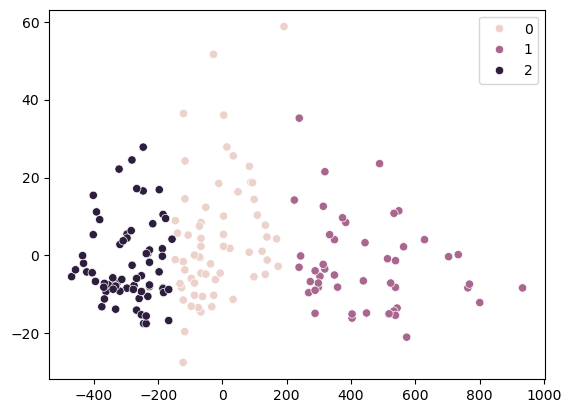

In [144]:
# X, y = make_blobs(centers=3, cluster_std=1.5, n_features=2, n_samples=1000)
eX = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=eX[:, 0], y=eX[:, 1], hue=y)
plt.show()

In [145]:
idx = 10
print(f"init point cluster: {y[idx]}")
target_cluster = 2

init point cluster: 1


In [146]:
explainer = dice_explainer(25)
# classifier = MLPClassifier(hidden_layer_sizes=(6,4))
# classifier = LogisticRegression()
classifier = RandomForestClassifier(n_estimators=1)
cf = baseline.baseline_explainer(X, y, classifier, explainer, idx, target_cluster=target_cluster, binary=False)

Done training classifier. Score: 0.9662921348314607


100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

Found 25 counterfactuals


Data has more than 2 features. Using PCA!


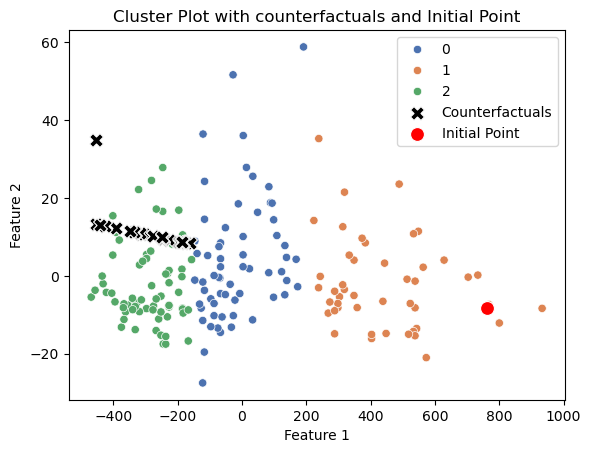

In [147]:
util.plot_cluster_cf(X, y, cf, idx)

In [148]:
print(f"minimality: {cf_minimality(cf, X[idx])}")
print(f"similarity: {cf_similarity(cf, X[idx])}")
print("plausibility", cf_plausibility(cf, target_cluster, X, y))

minimality: [0.84615385 0.84615385 0.84615385 0.84615385 0.84615385 0.92307692
 0.84615385 0.84615385 0.84615385 0.84615385 0.84615385 0.92307692
 0.92307692 0.92307692 0.92307692 0.92307692 0.84615385 0.84615385
 0.92307692 0.84615385 0.84615385 0.84615385 0.92307692 0.84615385
 0.84615385]
similarity: [ 938.90296602  991.30233153 1076.40160702 1067.00095825 1009.90032483
  953.1        1081.90854512 1007.50269424  923.67159207 1216.00021316
 1039.80106756 1039.8         959.4        1155.1        1096.5
 1098.6        1112.20003039  945.91871347 1013.          953.10142823
 1218.3914806   951.30003285 1190.9        1013.05545751 1203.70032167]
plausibility [-1.1892244  -0.9820406  -1.01007536 -1.02171028 -0.98584967 -1.08943746
 -1.0205773  -0.98584967 -1.3212301  -1.44383165 -0.98639131 -0.9861642
 -1.07701836 -1.08744069 -0.98555916 -0.98743285 -0.98944048 -1.13931043
 -0.99292314 -1.08937712 -1.5169991  -1.09816562 -1.26375152 -0.9881199
 -1.35107198]


In [ ]:
idxs = np.argsort(-cf_plausibility(cf, target_cluster, X, y))
print(idxs)

[ 1 14  7  4 11 10 15 23 16 18  2  6  3 12 13 19  5 21 17  0 22  8 24  9
 20]


Data has more than 2 features. Using PCA!


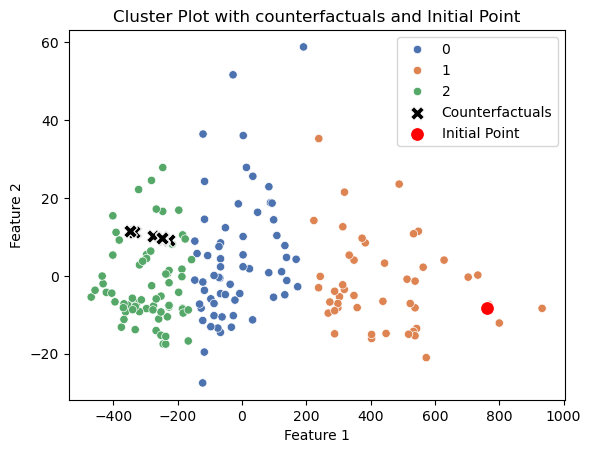

In [150]:
util.plot_cluster_cf(X, y, cf[idxs][0:10], idx)